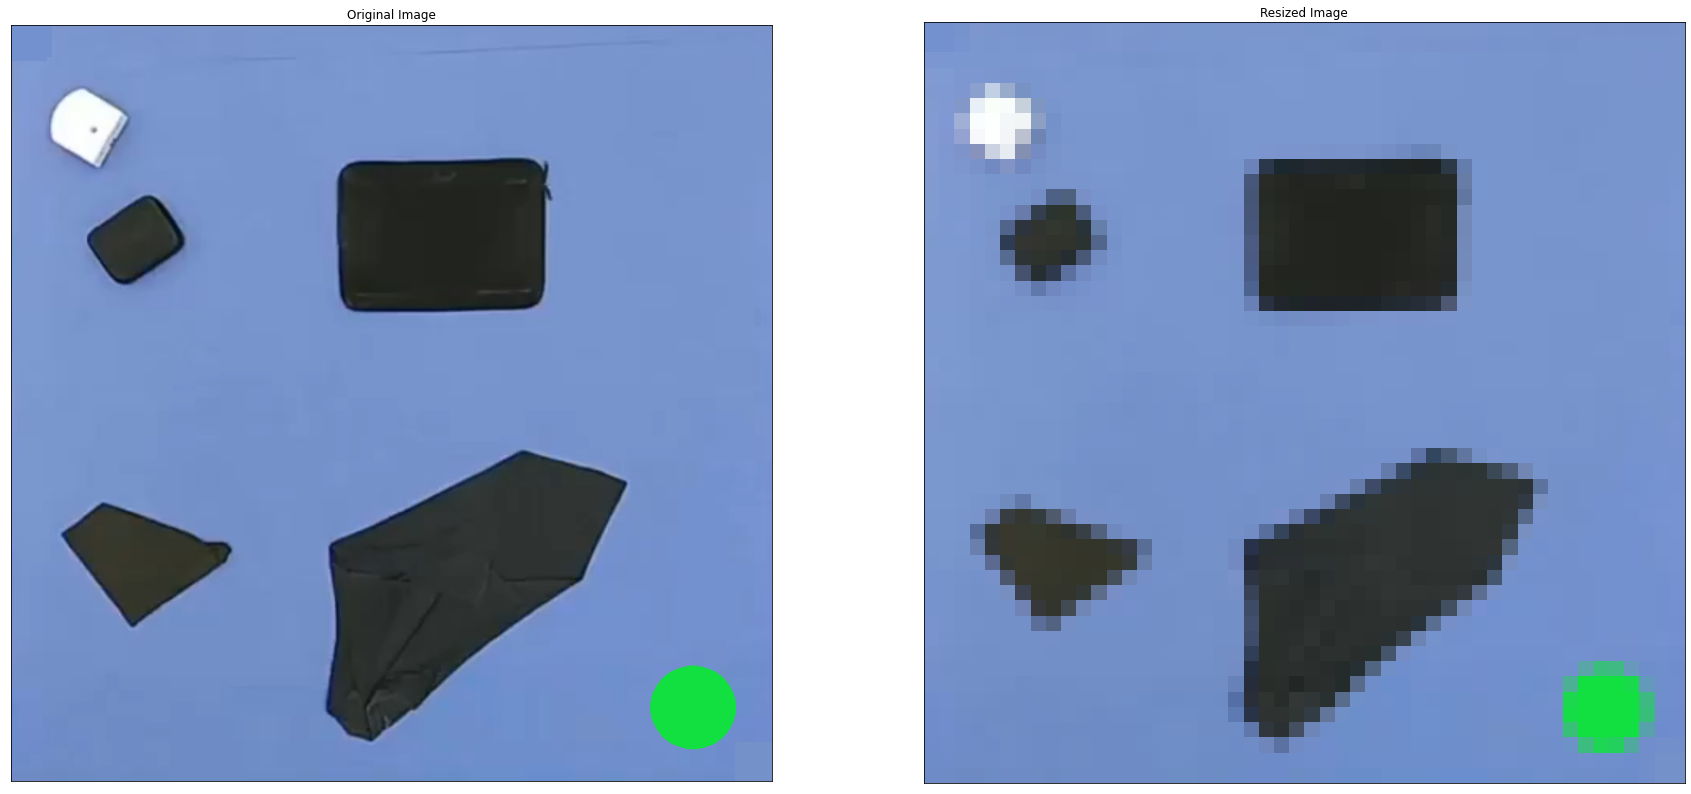

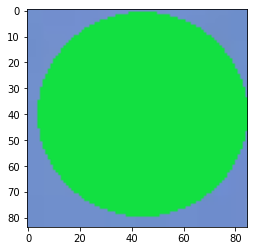

[38, 12]


(Text(0.5, 1.0, 'Matching Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

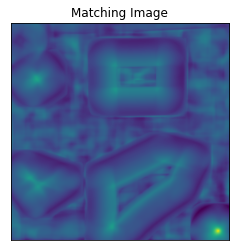

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

MAP_SIZE = 50

filename = 'input_picture.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)
original_height, original_width = img.shape[:2]


resized = cv2.resize(img, (MAP_SIZE,MAP_SIZE), interpolation = cv2.INTER_AREA) 
plt.figure(figsize=(30,50))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(resized[:,:,::-1])
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show

template = img[605:689,600:685,:]
plt.figure()
plt.imshow(template[:,:,::-1])
plt.show()

c, w, h  = template.shape[::-1]
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

goal = min_loc
x_goal=int(np.round(goal[0]*MAP_SIZE/original_width))
y_goal=MAP_SIZE-int(np.round(goal[1]*MAP_SIZE/original_height)) #confirm height and width

goal = [x_goal, y_goal]
print(goal)

plt.imshow(res)
plt.title('Matching Image'), plt.xticks([]), plt.yticks([])